In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
data['total_rooms']=np.log(data['total_rooms']+1)
data['total_bedrooms']=np.log(data['total_bedrooms']+1)
data['population']=np.log(data['population']+1)
data['households']=np.log(data['households']+1)

In [8]:
data.ocean_proximity.value_counts()
# One Hot Encoding
data=data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [9]:
#feature engineering: bedroom ratio, rooms in a household, population in a household
data['bedroom_ratio']=data['total_bedrooms']/data['total_rooms']
data['household_rooms']=data['total_rooms']/data['households']
data['household_population']=data['population']/data['households']

In [10]:
data['bedroom_ratio']=np.log(data['bedroom_ratio']+1)
data['household_rooms']=np.log(data['household_rooms']+1)
data['household_population']=np.log(data['household_population']+1)

In [11]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
train_data=x_train.join(y_train)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population,median_house_value
18742,-122.34,40.57,26.0,7.690743,6.159095,7.200425,6.139885,2.0395,False,True,False,False,False,0.588256,0.812080,0.775984,67900.0
8240,-118.19,33.77,21.0,7.651596,6.590301,6.970730,6.403574,1.6178,False,False,False,False,True,0.621274,0.786134,0.736479,137500.0
1416,-122.04,38.00,16.0,8.032035,6.598509,7.277939,6.565265,3.2484,False,False,False,True,False,0.599673,0.799044,0.746002,91100.0
11477,-118.02,33.72,22.0,9.087608,7.442493,8.390496,7.374629,4.4453,True,False,False,False,False,0.598271,0.803023,0.759755,267800.0
12246,-116.96,33.74,19.0,8.202482,6.628041,7.448916,6.546785,2.2115,False,True,False,False,False,0.592251,0.812219,0.759776,87600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10734,-117.87,33.60,34.0,8.136226,6.659294,7.151485,6.577861,4.4980,True,False,False,False,False,0.597998,0.805096,0.735826,482900.0
3781,-118.39,34.16,46.0,7.367077,5.634790,6.403574,5.648974,5.1169,True,False,False,False,False,0.568072,0.834709,0.757802,414300.0
13203,-117.68,34.05,25.0,7.528332,6.139885,6.976348,5.926926,2.5395,False,True,False,False,False,0.596400,0.819864,0.777975,187500.0
6712,-118.17,34.14,45.0,7.722235,5.655992,6.633318,5.723585,11.7894,True,False,False,False,False,0.549525,0.854073,0.769620,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'bedroom_ratio'}>],
       [<Axes: title={'center': 'household_rooms'}>,
        <Axes: title={'center': 'household_population'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

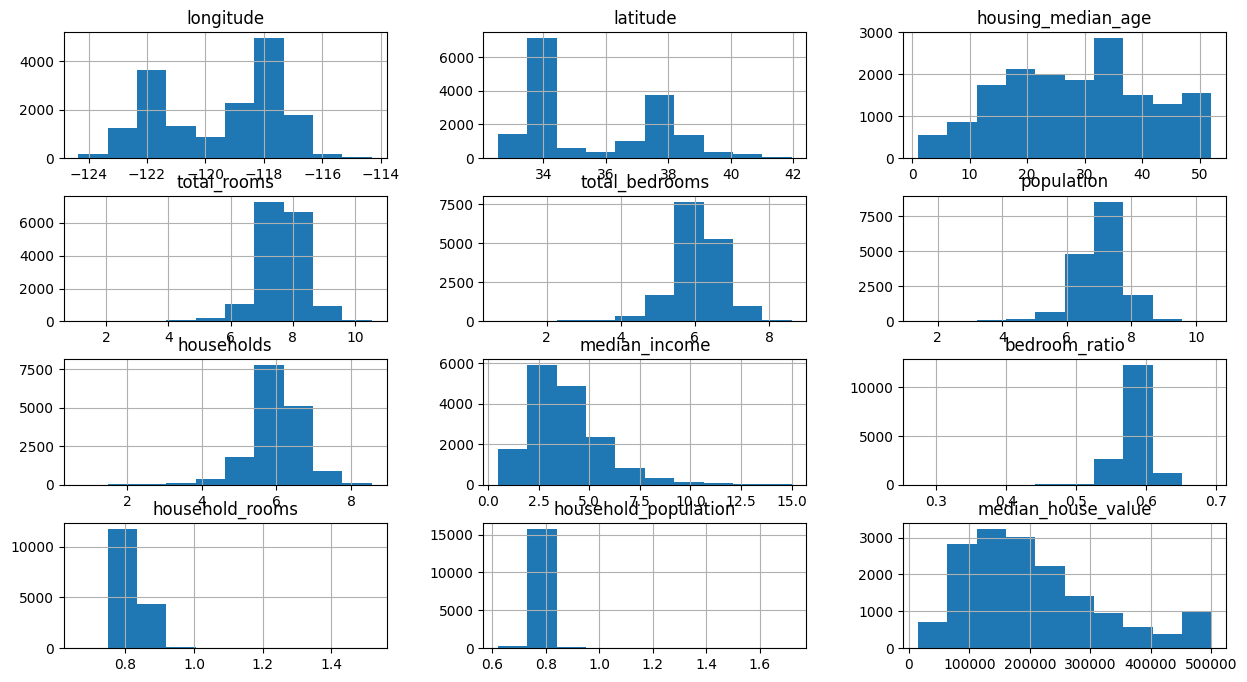

In [15]:
train_data.hist(figsize=[15,8])

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population,median_house_value
18742,-122.34,40.57,26.0,7.690743,6.159095,7.200425,6.139885,2.0395,False,True,False,False,False,0.588256,0.812080,0.775984,67900.0
8240,-118.19,33.77,21.0,7.651596,6.590301,6.970730,6.403574,1.6178,False,False,False,False,True,0.621274,0.786134,0.736479,137500.0
1416,-122.04,38.00,16.0,8.032035,6.598509,7.277939,6.565265,3.2484,False,False,False,True,False,0.599673,0.799044,0.746002,91100.0
11477,-118.02,33.72,22.0,9.087608,7.442493,8.390496,7.374629,4.4453,True,False,False,False,False,0.598271,0.803023,0.759755,267800.0
12246,-116.96,33.74,19.0,8.202482,6.628041,7.448916,6.546785,2.2115,False,True,False,False,False,0.592251,0.812219,0.759776,87600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10734,-117.87,33.60,34.0,8.136226,6.659294,7.151485,6.577861,4.4980,True,False,False,False,False,0.597998,0.805096,0.735826,482900.0
3781,-118.39,34.16,46.0,7.367077,5.634790,6.403574,5.648974,5.1169,True,False,False,False,False,0.568072,0.834709,0.757802,414300.0
13203,-117.68,34.05,25.0,7.528332,6.139885,6.976348,5.926926,2.5395,False,True,False,False,False,0.596400,0.819864,0.777975,187500.0
6712,-118.17,34.14,45.0,7.722235,5.655992,6.633318,5.723585,11.7894,True,False,False,False,False,0.549525,0.854073,0.769620,500001.0


In [17]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population,median_house_value
longitude,1.000000,-0.924168,-0.110423,0.034841,0.065351,0.113204,0.061018,-0.017543,0.321277,-0.054795,0.009394,-0.473647,0.042360,0.097595,-0.073683,0.076704,-0.046394
latitude,-0.924168,1.000000,0.012308,-0.037406,-0.072784,-0.140816,-0.093678,-0.077459,-0.446373,0.351125,-0.016553,0.358516,-0.158850,-0.113357,0.149127,-0.054875,-0.143156
housing_median_age,-0.110423,0.012308,1.000000,-0.318673,-0.277985,-0.246117,-0.246345,-0.118300,0.043545,-0.237115,0.014069,0.255814,0.023999,-0.041871,-0.034083,0.077311,0.103911
total_rooms,0.034841,-0.037406,-0.318673,1.000000,0.946605,0.863030,0.931637,0.206358,0.021577,-0.015974,-0.009544,-0.015989,0.005538,0.424471,-0.375034,-0.535182,0.157923
total_bedrooms,0.065351,-0.072784,-0.277985,0.946605,1.000000,0.896276,0.974244,-0.023063,0.044002,-0.047920,-0.003343,-0.016443,0.016648,0.681849,-0.558958,-0.563877,0.054523
population,0.113204,-0.140816,-0.246117,0.863030,0.896276,1.000000,0.931265,-0.001938,0.116032,-0.075610,-0.013745,-0.057843,-0.012236,0.582322,-0.629336,-0.244091,-0.020482
households,0.061018,-0.093678,-0.246345,0.931637,0.974244,0.931265,1.000000,0.006737,0.074635,-0.090550,-0.009727,-0.005739,0.020613,0.644079,-0.663593,-0.557856,0.073167
median_income,-0.017543,-0.077459,-0.118300,0.206358,-0.023063,-0.001938,0.006737,1.000000,0.167915,-0.236940,-0.010582,0.055851,0.027708,-0.504886,0.344397,-0.007321,0.687602
<1H OCEAN,0.321277,-0.446373,0.043545,0.021577,0.044002,0.116032,0.074635,0.167915,1.000000,-0.604528,-0.013931,-0.314022,-0.346351,0.079927,-0.138595,0.044044,0.254516
INLAND,-0.054795,0.351125,-0.237115,-0.015974,-0.047920,-0.075610,-0.090550,-0.236940,-0.604528,1.000000,-0.010621,-0.239414,-0.264062,-0.102495,0.189191,0.067818,-0.483136


<Axes: >

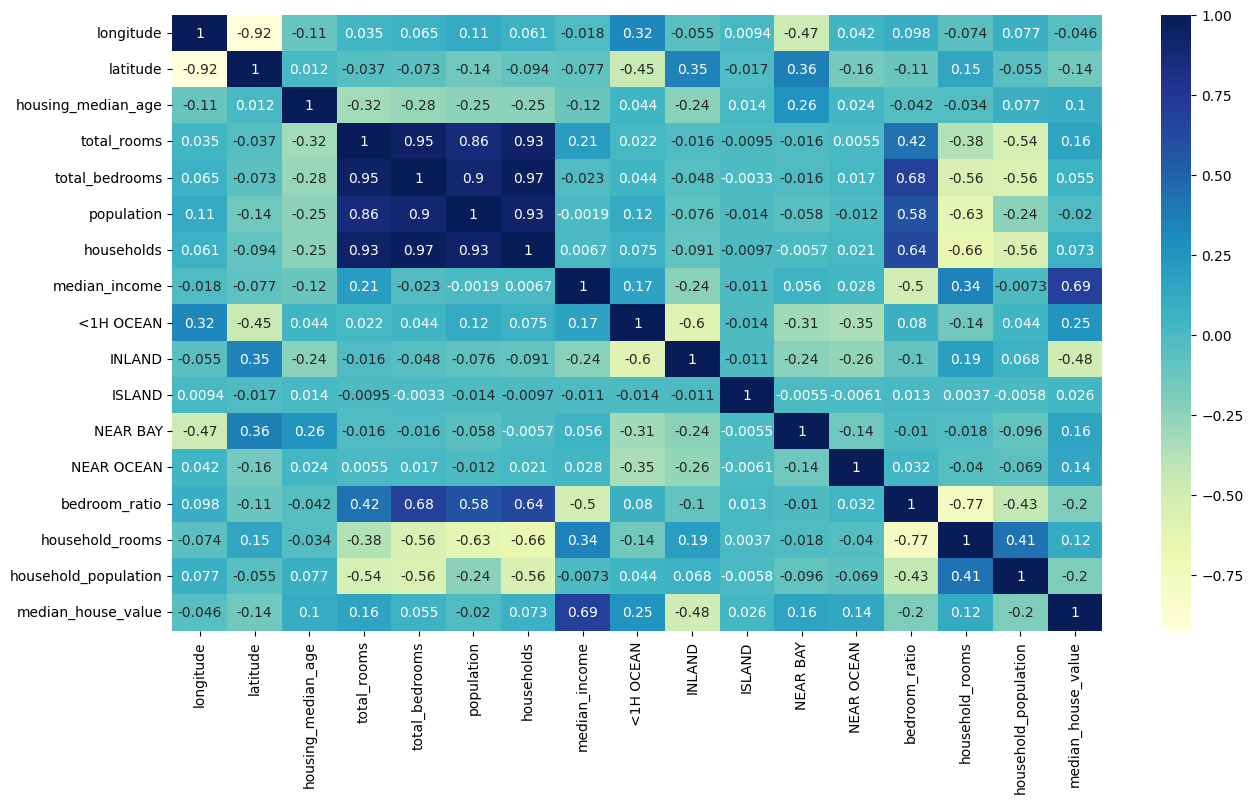

In [18]:
# Correlation
plt.figure(figsize=[15,8])
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

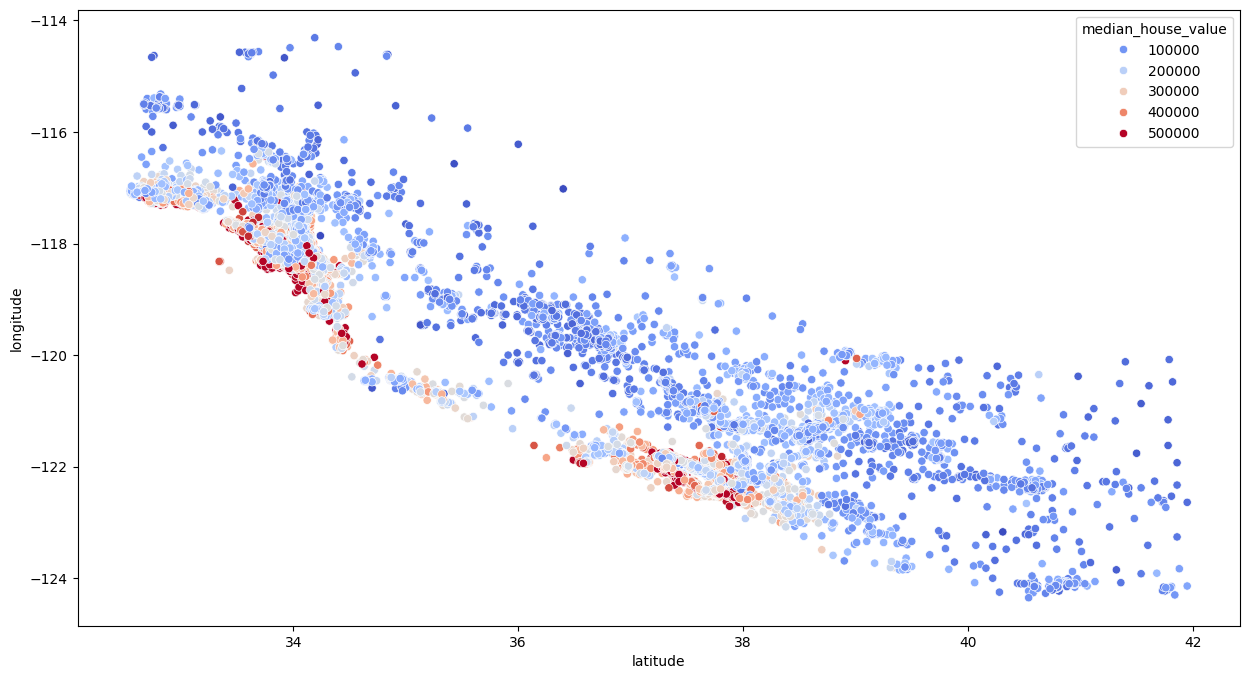

In [19]:
# California Visualization based on House Prices
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [20]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population
18742,-122.34,40.57,26.0,7.690743,6.159095,7.200425,6.139885,2.0395,False,True,False,False,False,0.588256,0.812080,0.775984
8240,-118.19,33.77,21.0,7.651596,6.590301,6.970730,6.403574,1.6178,False,False,False,False,True,0.621274,0.786134,0.736479
1416,-122.04,38.00,16.0,8.032035,6.598509,7.277939,6.565265,3.2484,False,False,False,True,False,0.599673,0.799044,0.746002
11477,-118.02,33.72,22.0,9.087608,7.442493,8.390496,7.374629,4.4453,True,False,False,False,False,0.598271,0.803023,0.759755
12246,-116.96,33.74,19.0,8.202482,6.628041,7.448916,6.546785,2.2115,False,True,False,False,False,0.592251,0.812219,0.759776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10734,-117.87,33.60,34.0,8.136226,6.659294,7.151485,6.577861,4.4980,True,False,False,False,False,0.597998,0.805096,0.735826
3781,-118.39,34.16,46.0,7.367077,5.634790,6.403574,5.648974,5.1169,True,False,False,False,False,0.568072,0.834709,0.757802
13203,-117.68,34.05,25.0,7.528332,6.139885,6.976348,5.926926,2.5395,False,True,False,False,False,0.596400,0.819864,0.777975
6712,-118.17,34.14,45.0,7.722235,5.655992,6.633318,5.723585,11.7894,True,False,False,False,False,0.549525,0.854073,0.769620


In [21]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population
14262,-117.11,32.71,29.0,6.947937,5.676754,6.961296,5.697093,1.1818,False,False,False,False,True,0.597210,0.797308,0.798364
12231,-116.93,33.75,14.0,8.704171,7.046647,8.051022,6.944087,2.9640,False,True,False,False,False,0.593090,0.812469,0.769834
5158,-118.28,33.96,42.0,7.095893,5.720312,7.063048,5.525453,1.6150,True,False,False,False,False,0.591194,0.826024,0.823419
2285,-119.77,36.79,27.0,7.722678,6.059123,6.981935,6.049733,2.9937,False,True,False,False,False,0.579188,0.822653,0.767368
5344,-118.43,34.04,52.0,7.486053,5.733341,6.601230,5.730100,5.2954,True,False,False,False,False,0.568643,0.835707,0.766410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,-117.69,35.65,5.0,7.031741,5.624018,6.255750,5.451038,4.0167,False,True,False,False,False,0.587678,0.828544,0.764363
11431,-117.96,33.67,16.0,8.545586,6.481577,7.700748,6.458338,7.0173,True,False,False,False,False,0.564445,0.842940,0.784984
2709,-115.69,32.79,18.0,7.355641,5.831882,7.057898,5.840642,2.1792,False,True,False,False,False,0.583804,0.815095,0.792273
8191,-118.12,33.79,43.0,7.294377,5.710427,6.643790,5.743003,4.3317,True,False,False,False,False,0.578215,0.819838,0.768649


In [22]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [23]:
reg.fit(x_train,y_train)

LinearRegression()

In [24]:
reg.score(x_test,y_test)

0.680447573597681

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [26]:
x_train_s=scaler.fit_transform(x_train)
reg.fit(x_train_s,y_train)

LinearRegression()

In [27]:
x_test_s=scaler.transform(x_test)

In [28]:
reg.score(x_test_s,y_test)

0.6804475735976812

In [29]:
#Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
forest.score(x_test,y_test)

0.8271603449464038

In [31]:
forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [32]:
forest.score(x_test_s,y_test)

0.8261019166531047

In [34]:
# Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV
param_grid={
    #hyperparameters
    "n_estimators":[20,70,100],"min_samples_split":[2,4,6,8],"max_depth": [None,4,8]
}
grid_search=GridSearchCV(forest,param_grid, cv=5,scoring="neg_mean_squared_error",return_train_score=True)   # 5 fold cross-validation
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [20, 70, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
best_forest=grid_search.best_estimator_

In [36]:
best_forest.score(x_test_s,y_test)

0.8265295687799683